Project 2

Start date: March 4 2025

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
## Load data
df = pd.read_csv('data/term-deposit-marketing-2020.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [10]:
print("Dataset Shape:", df.shape)

Dataset Shape: (40000, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [ ]:
## Statistics (including categorical data)
## For categorical data: The top is the most common value. The freq is the most common value’s frequency. 
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


In [22]:
df[df['balance']<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
25,44,admin,married,secondary,no,-372,yes,no,unknown,5,may,172,1,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,no
45,36,admin,single,primary,no,-171,yes,no,unknown,5,may,242,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39347,24,services,single,secondary,yes,-1414,yes,yes,cellular,18,may,171,2,no
39349,37,blue-collar,married,unknown,no,-118,yes,no,cellular,18,may,21,2,no
39528,40,blue-collar,married,primary,no,-310,yes,yes,cellular,26,may,133,2,no
39674,58,retired,married,primary,yes,-235,no,yes,telephone,27,may,93,2,no


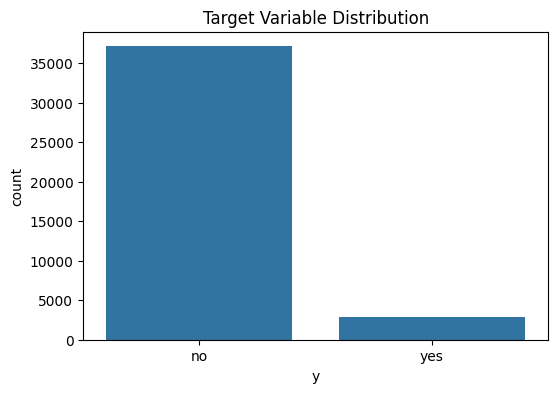

In [11]:
# Visualizing target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["y"])
plt.title("Target Variable Distribution")
plt.show()

In [25]:
print('Said no: ', (37104/40000)*100)
print('Said yes: ', ((40000-37104)/40000)*100)

## Counts
df['y'].value_counts()

Said no:  92.75999999999999
Said yes:  7.24


y
no     37104
yes     2896
Name: count, dtype: int64

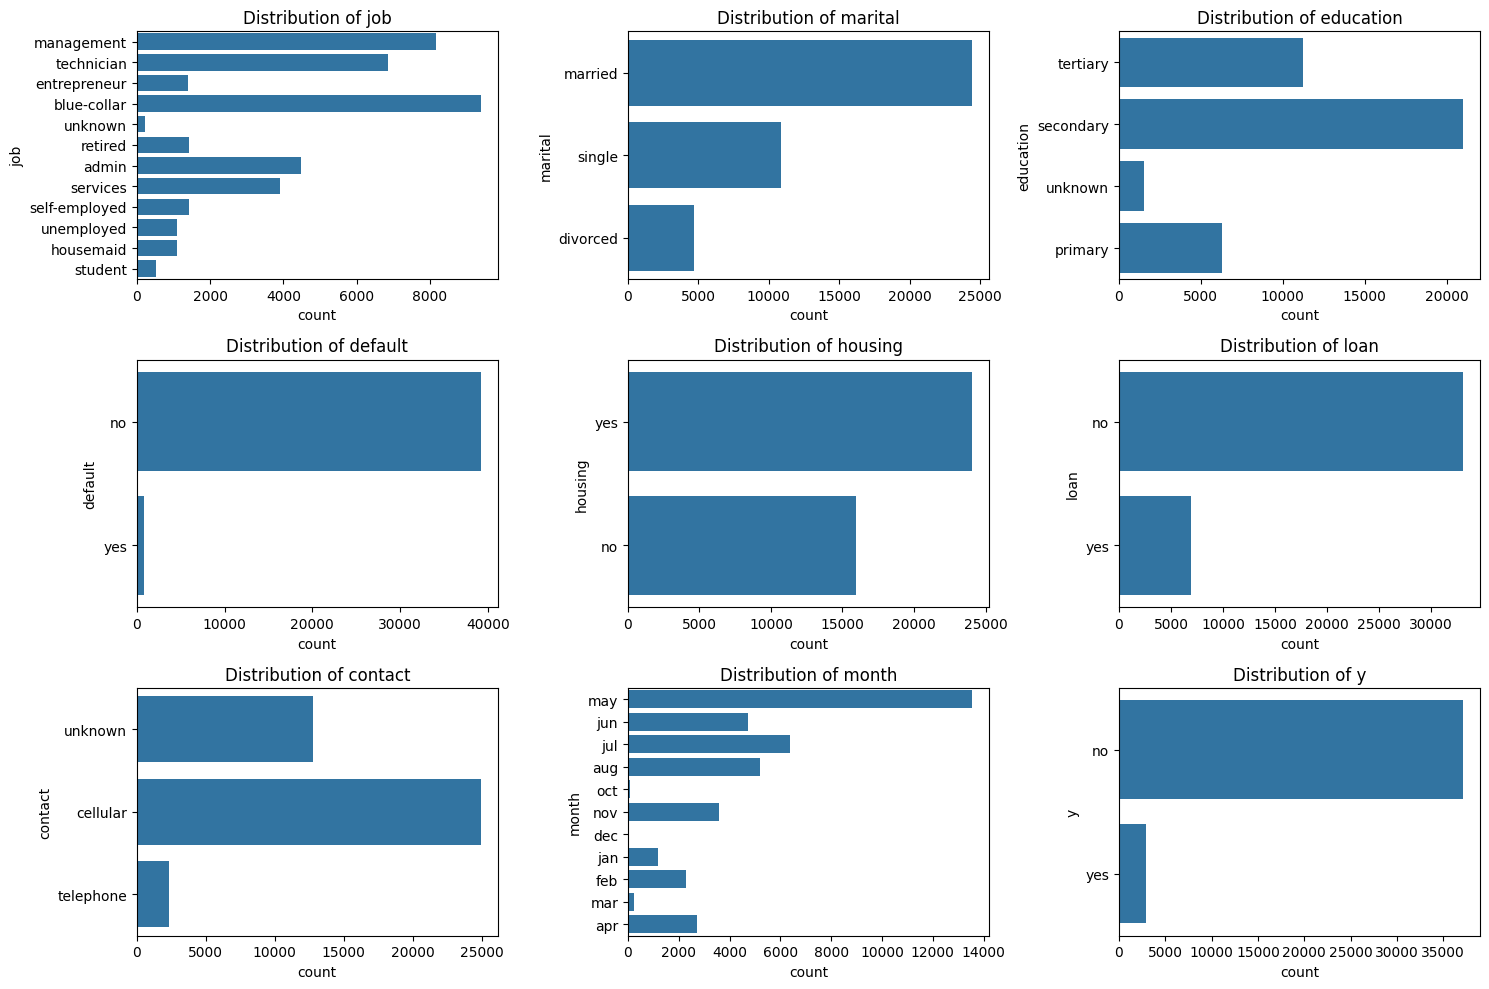

In [13]:
# Categorical variable distributions
categorical_features = df.select_dtypes(include=["object", "category"]).columns
num_categories = len(categorical_features)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_features):
    if i < len(axes):
        sns.countplot(y=df[col], ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

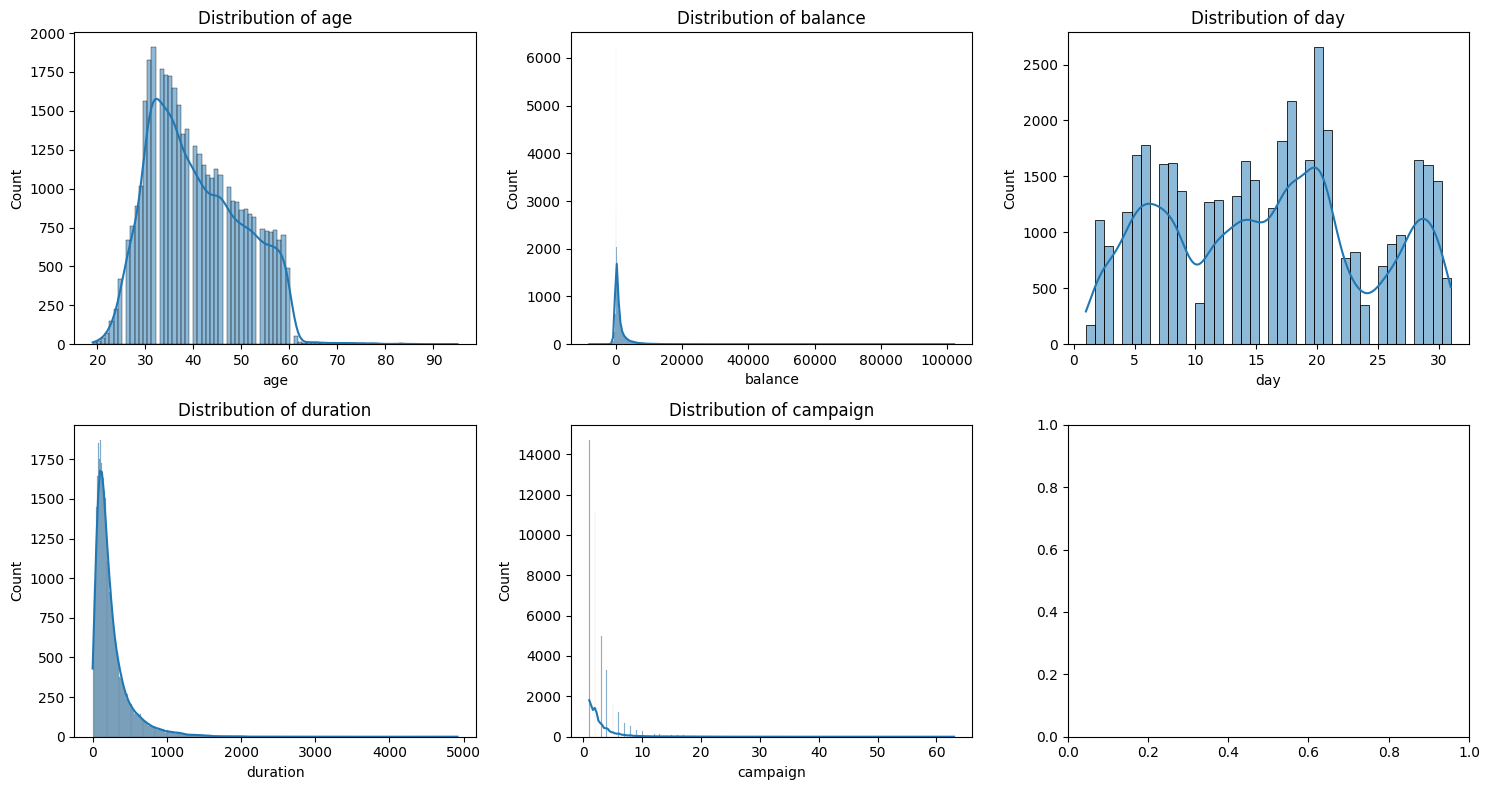

In [18]:
# Numerical variable distributions
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
num_numerical_features = len(numerical_features)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    if i < len(axes):
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

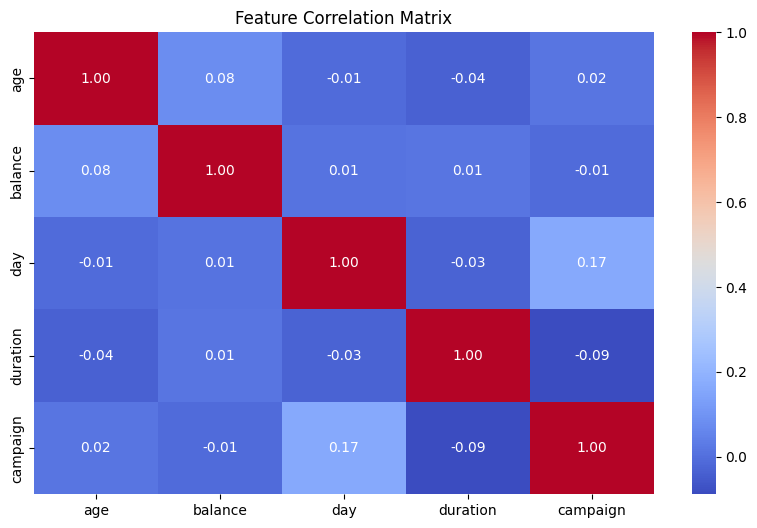

In [21]:
# Correlation heatmap
numeric_df = df.select_dtypes(['int64','float64']).copy()
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

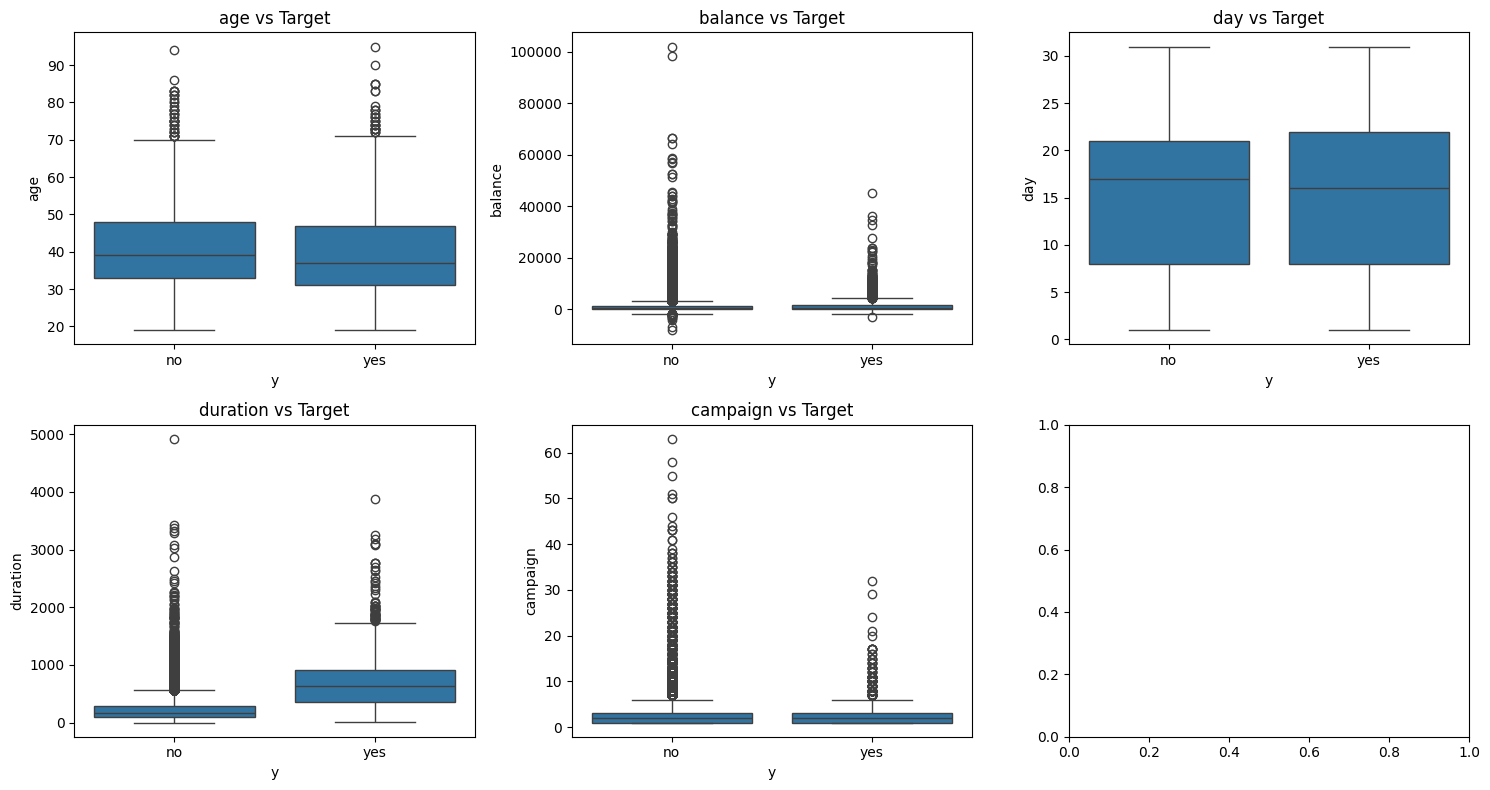

In [33]:
# Relationship between numerical features and target variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    if i < len(axes):
        sns.boxplot(x=df["y"], y=df[col], ax=axes[i])  # Replace 'target' with actual column name
        axes[i].set_title(f"{col} vs Target")
plt.tight_layout()
plt.show()

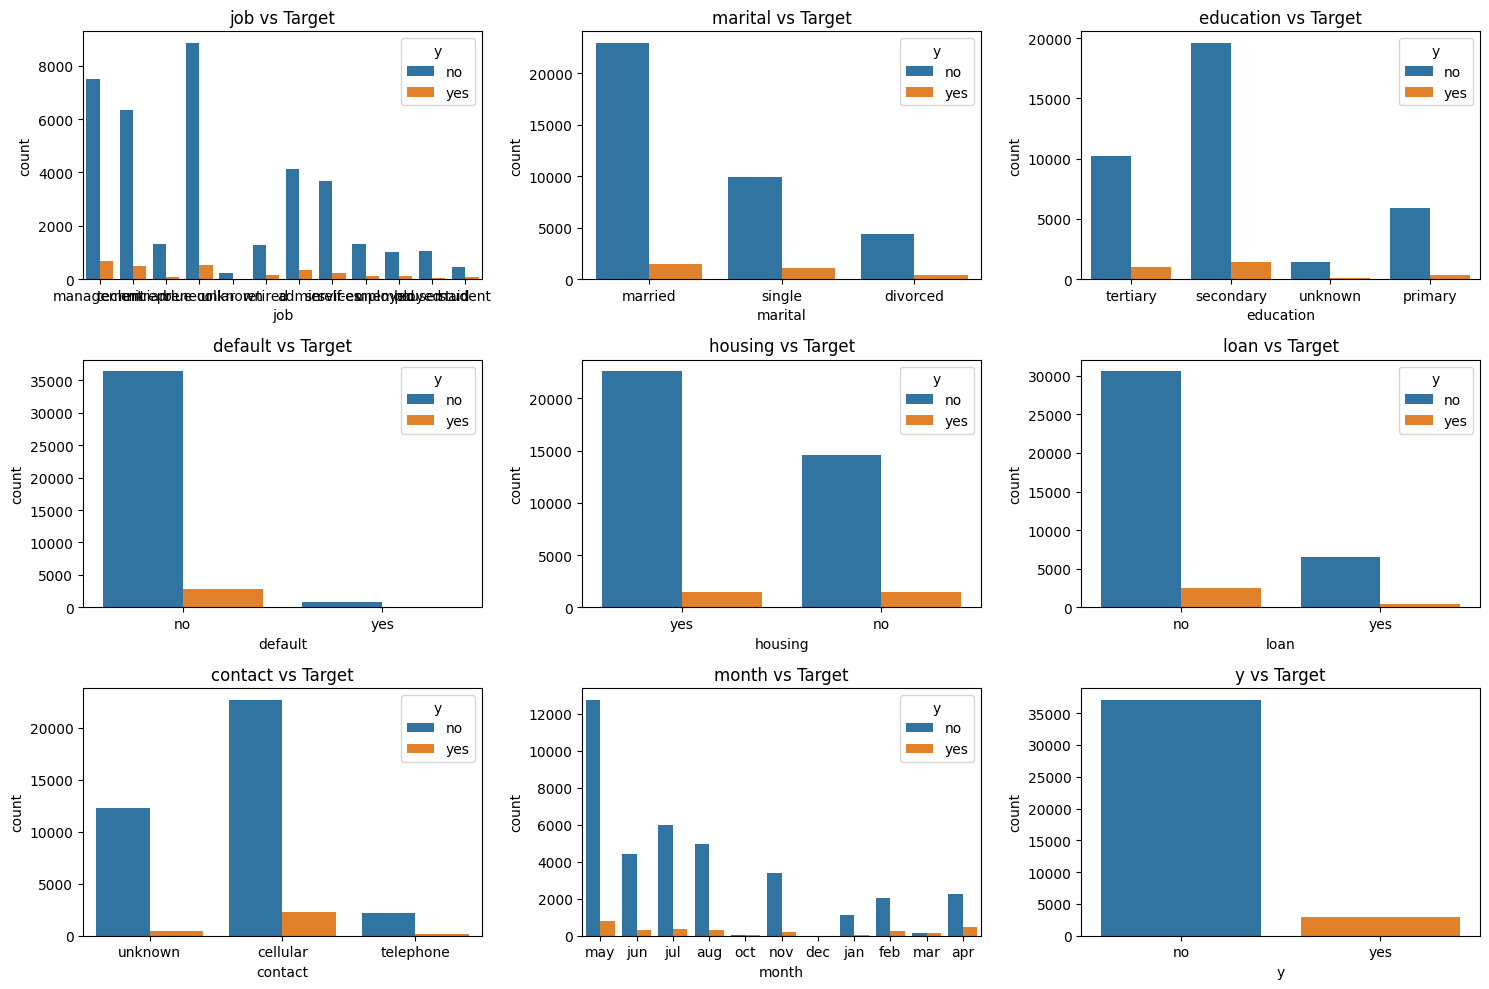

In [47]:
# Relationship between categorical features and target variable
num_categories = len(categorical_features)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_features):
    if i < len(axes):
        sns.countplot(x=df[col], hue=df["y"], ax=axes[i])  # Replace 'target' with actual column name
        #sns.catplot(data=df, x=col, y="age", hue="y", kind="box")
        #sns.boxplot(data=df, x=col, y=df[col], hue="y", ax=axes[i])
        axes[i].set_title(f"{col} vs Target")
        #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

Multilayered ML

They have made 40000 calls and most of them have said no. Can we eliminate unwanted calls?

Model 1
Before making calls, eliminate unwanted customers (no call related features. Only use demographic and financial features because we haven't made any calls yet.)
This helps filter data. Should we use recall? 

MODEL 2
Using filtered data only train the next model.
Which of the customers we should KEEP calling (using all features)

We should strike a balance between recall and precision.

Look at 'Campaign' feature. The minimum is 1 and maximum is 63. So they have called someone 63 times! 
Look more into this feature. Number of times vs rate of saying yes/no?
